In [17]:
import matplotlib.pyplot as plt
import numpy as np

In [18]:
switch_seconds = range(6, 46, 1)

waiting_time_per_switch = [44.23061945051865, 33.48309692890462, 25.641620900497674, 20.73908398741047, 18.811550991611046, 18.444953773948413, 18.608264497372616, 18.587830055470405, 18.496270535905932, 18.74898538906817, 18.76833268876456, 18.929828390767078, 19.446840376697153, 19.413453516711808, 19.61265359475662, 19.779444065077236, 20.30253271227773, 20.604559830413773, 20.59190672953737, 20.5734971665076, 21.282928761900802, 21.697494742890015, 21.48434636098066, 21.70349638980257, 22.1257536611073, 22.676216491165, 22.752283138237754, 23.35909785323679, 22.841312568667878, 23.38350688298522, 23.590667901136776, 23.908213882421368, 24.021765752833662, 24.89663242196171, 25.278936311308453, 25.7095904431027, 24.880952620165317, 24.7571074442072, 24.907048621319824, 25.466424121686174]

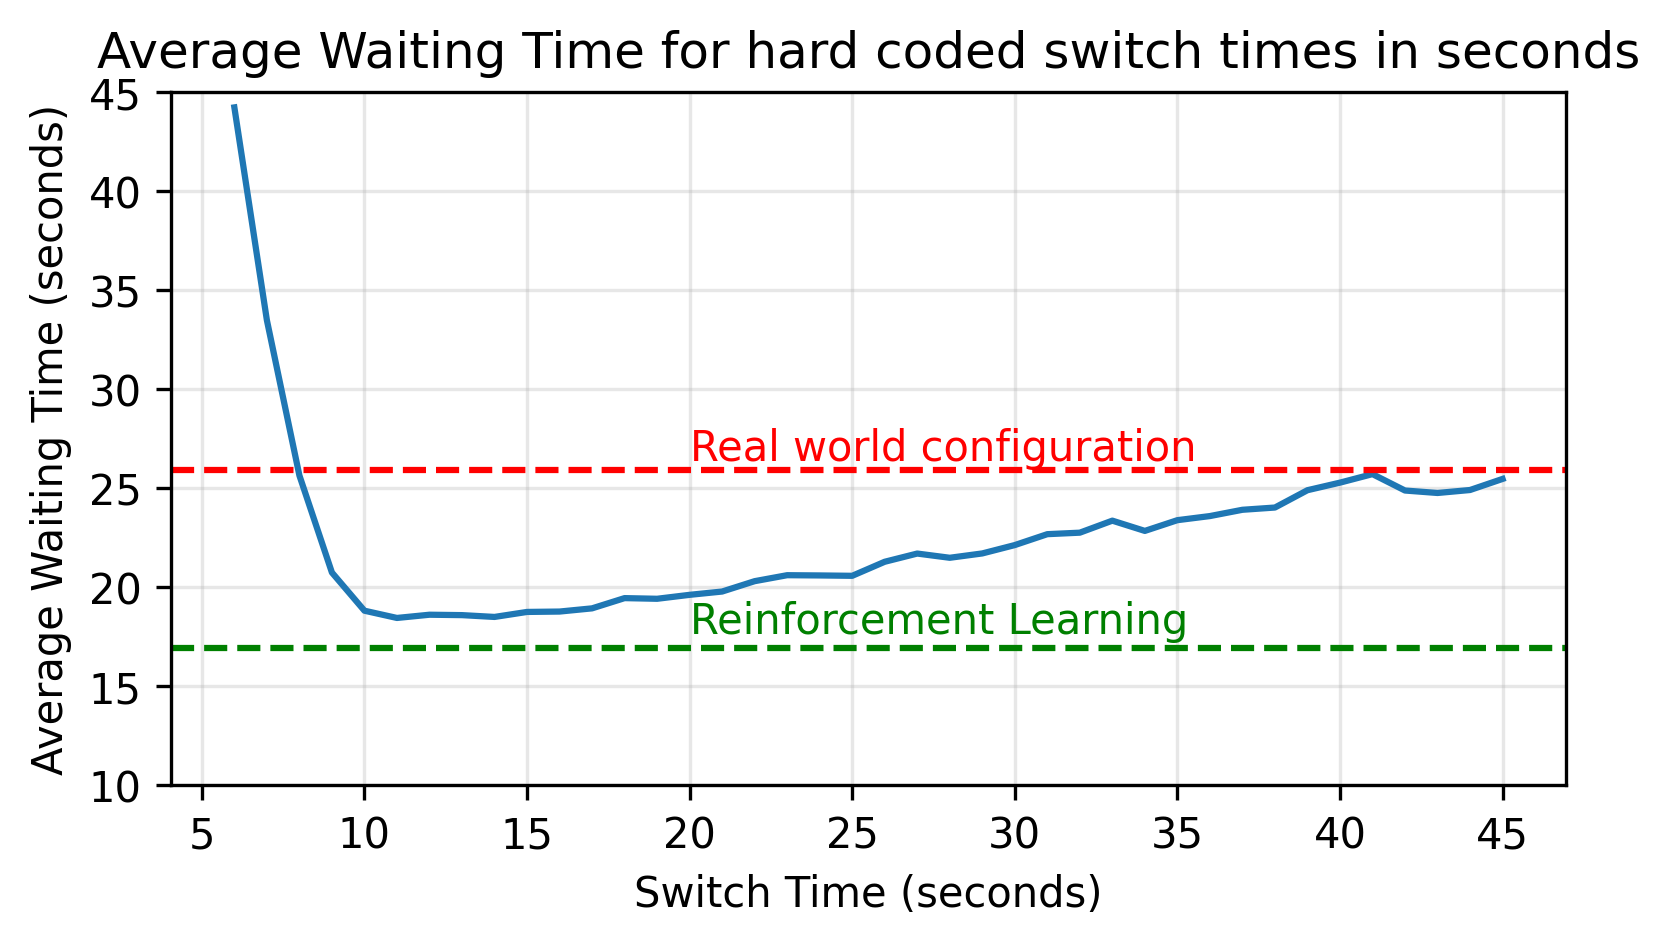

In [28]:
# high resolution plot
plt.figure(figsize=(6, 3), dpi=300)

# plot the results
plt.plot(switch_seconds, waiting_time_per_switch)

# dashed line at 25.88
plt.axhline(y=25.92, color='r', linestyle='--')
# label at 25.88
plt.text(20, 26.4, 'Real world configuration', fontsize=10, color='r')

# dashed line at 17.38
plt.axhline(y=16.93, color='g', linestyle='--')
# label at 17.38
plt.text(20, 17.7, 'Reinforcement Learning', fontsize=10, color='g')

plt.xlabel('Switch Time (seconds)')
plt.ylabel('Average Waiting Time (seconds)')

plt.ylim(10, 45)
# show grid light
plt.grid(True, alpha=0.3)
plt.title('Average Waiting Time for hard coded switch times in seconds')
plt.savefig('graph grid search and rl and current.png')
plt.show()

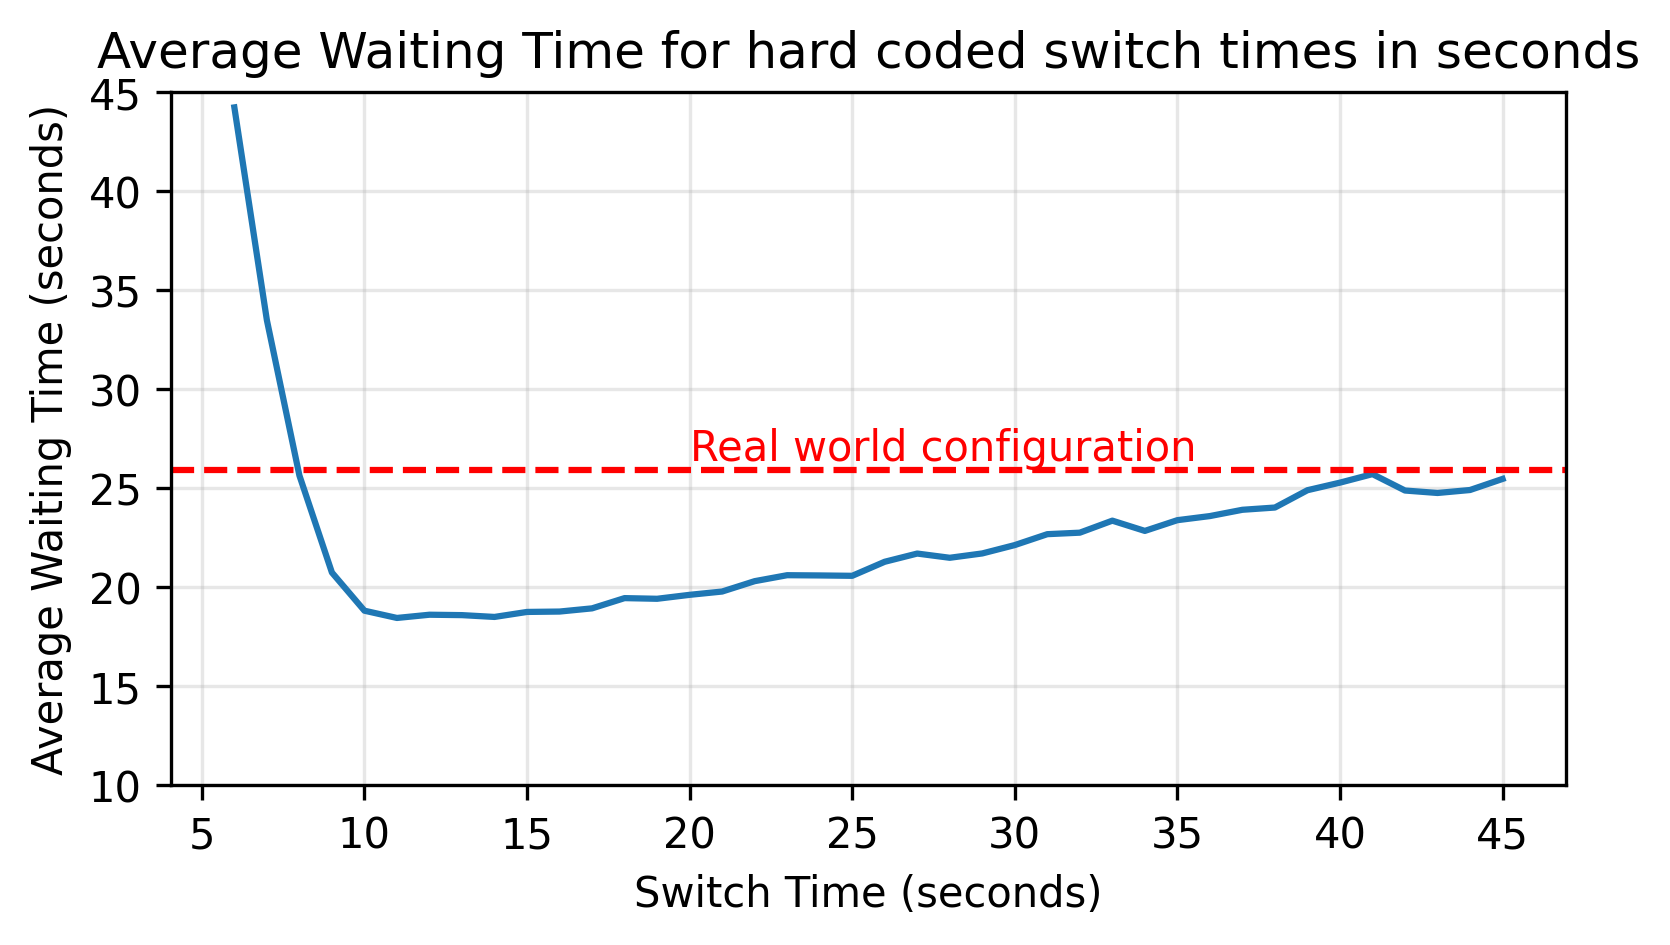

In [30]:
# high resolution plot
plt.figure(figsize=(6, 3), dpi=300)

# plot the results
plt.plot(switch_seconds, waiting_time_per_switch)

# dashed line at 25.88
#plt.axhline(y=25.88, color='r', linestyle='--')
# label at 25.88
#plt.text(20, 26.1, 'Real world configuration', fontsize=14, color='r')
# dashed line at 25.88
plt.axhline(y=25.92, color='r', linestyle='--')
# label at 25.88
plt.text(20, 26.4, 'Real world configuration', fontsize=10, color='r')

# dashed line at 17.38
#plt.axhline(y=17.38, color='g', linestyle='--')
# label at 17.38
#plt.text(20, 17.58, 'Reinforcement Learning', fontsize=14, color='g')

plt.xlabel('Switch Time (seconds)')
plt.ylabel('Average Waiting Time (seconds)')

plt.ylim(10, 45)
# show grid light
plt.grid(True, alpha=0.3)
plt.title('Average Waiting Time for hard coded switch times in seconds')
plt.savefig('graph grid search.png')
plt.show()


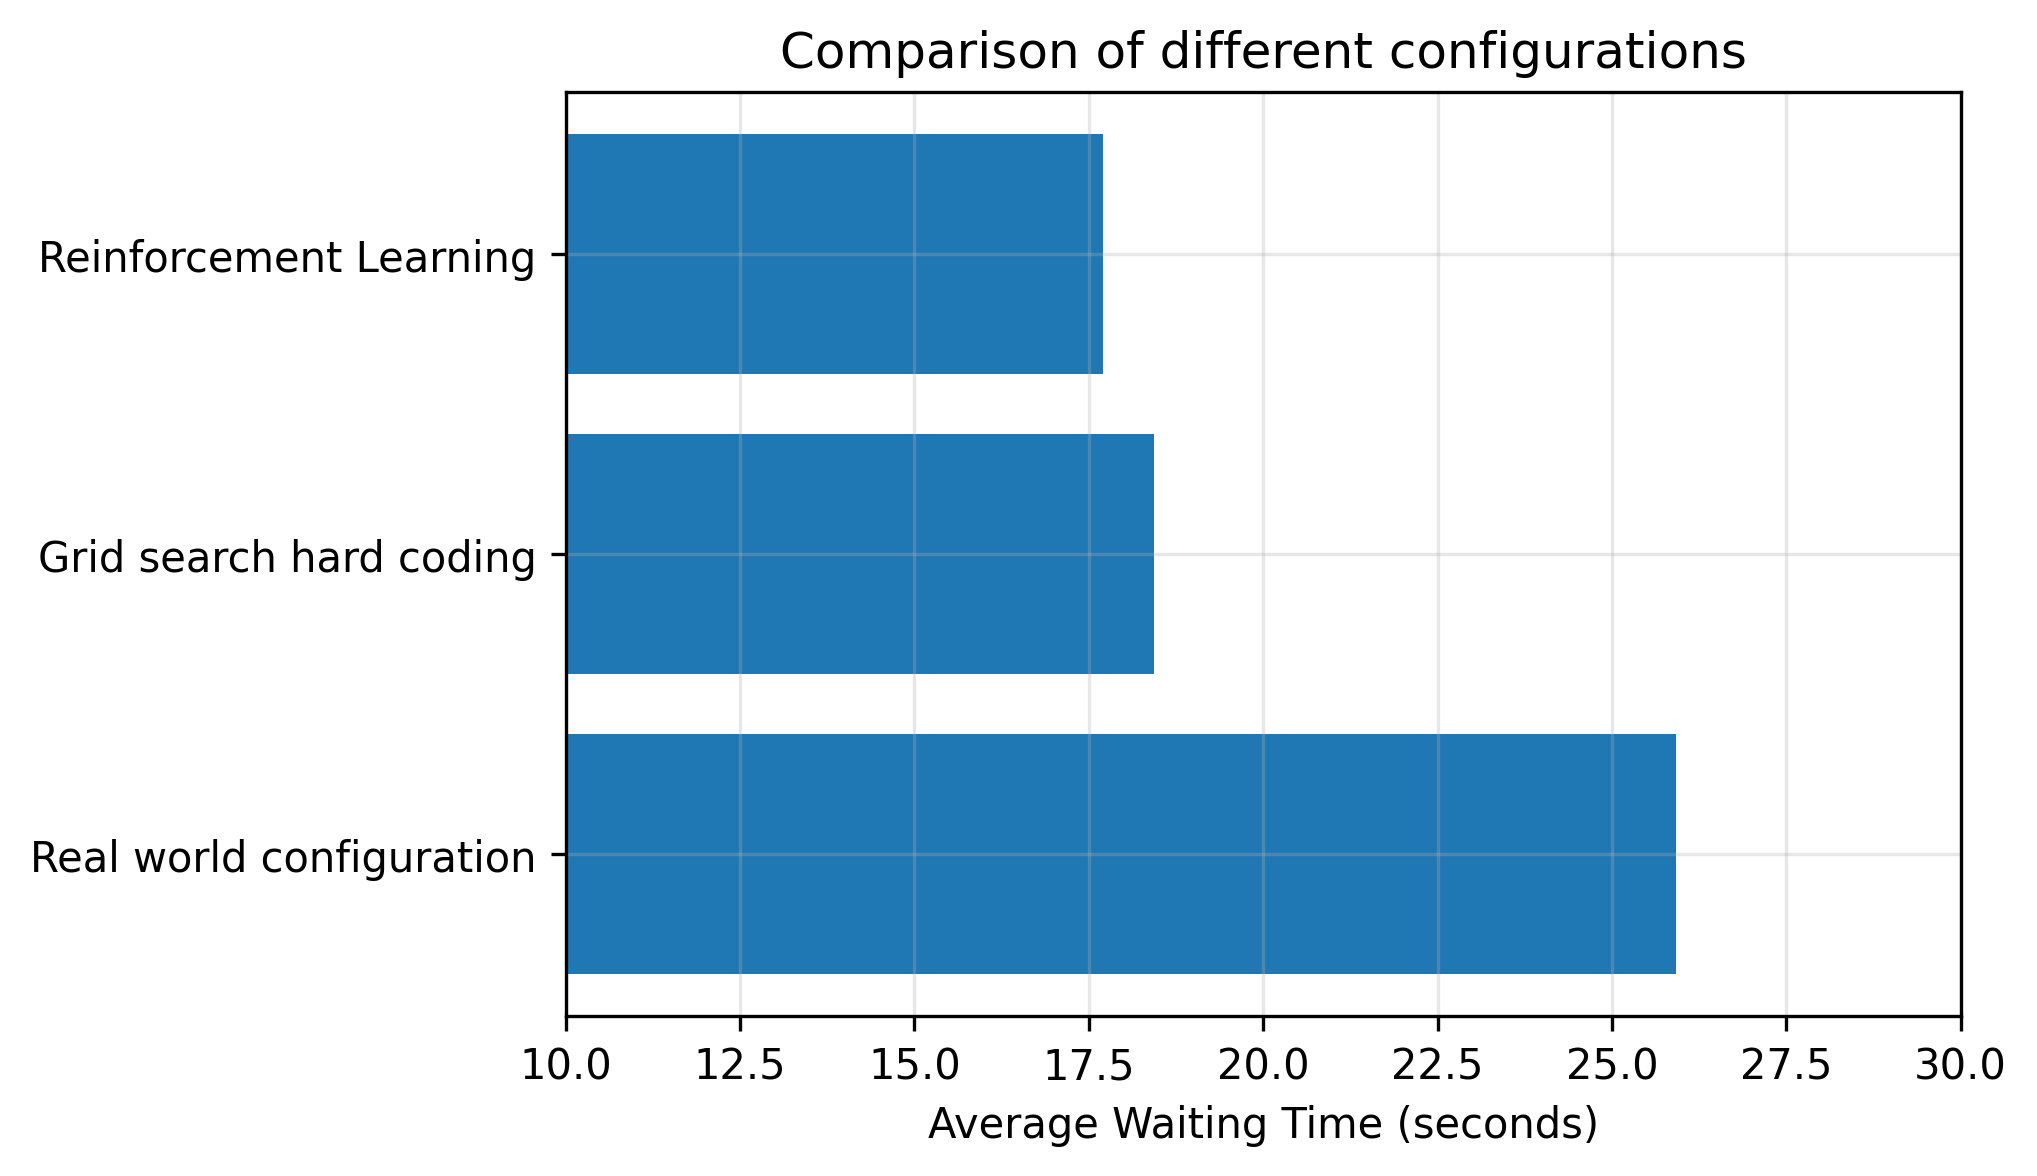

In [39]:
# horizontal bar char of 25.92 (real world), 18.44 (grid search hard coding), 17.7 (rl)
# high resolution plot
plt.figure(figsize=(6, 4), dpi=300)

# plot the results
plt.barh(['Real world configuration', 'Grid search hard coding', 'Reinforcement Learning'], [25.92, 18.44, 17.7])

plt.xlabel('Average Waiting Time (seconds)')

plt.xlim(10, 30)
# show grid light
plt.grid(True, alpha=0.3)
plt.title('Comparison of different configurations')
plt.savefig('bar.png')
plt.show()

In [21]:
print(f'Optimal switch time: {switch_seconds[np.argmin(waiting_time_per_switch)]} seconds')

Optimal switch time: 11 seconds


In [24]:
# sort the waiting times
sorted_waiting_times = np.sort(waiting_time_per_switch)
sorted_waiting_times    

array([18.44495377, 18.49627054, 18.58783006, 18.6082645 , 18.74898539,
       18.76833269, 18.81155099, 18.92982839, 19.41345352, 19.44684038,
       19.61265359, 19.77944407, 20.30253271, 20.57349717, 20.59190673,
       20.60455983, 20.73908399, 21.28292876, 21.48434636, 21.69749474,
       21.70349639, 22.12575366, 22.67621649, 22.75228314, 22.84131257,
       23.35909785, 23.38350688, 23.5906679 , 23.90821388, 24.02176575,
       24.75710744, 24.88095262, 24.89663242, 24.90704862, 25.27893631,
       25.46642412, 25.6416209 , 25.70959044, 33.48309693, 44.23061945])

In [22]:
print(f'Average waiting time: {min(waiting_time_per_switch)} seconds')

Average waiting time: 18.444953773948413 seconds


In [1]:
# read the tensorboard logs of the rl model (/1683883765)
# Path: graphs.ipynb
import matplotlib.pyplot as plt
import numpy as np

logs_path = 'logs/1683883765/'

# read the tensorboard logs
with open('/Users/roberto/Documents/GitHub/reinforcement-learning-stoplight/logs/1683883765/PPO_1/events.out.tfevents.1683883765.Robertos-Air.lan.3998.0' , 'rb') as f:
    content = f.readlines()

# to pandas dataframe
import pandas as pd
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

event_acc = EventAccumulator(logs_path)
event_acc.Reload()

# Show all tags in the log file
print(event_acc.Tags())

# E. g. get wall clock, number of steps and value for a scalar 'Accuracy'
w_times, step_nums, vals = zip(*event_acc.Scalars('episode_reward_mean'))

# high resolution plot
plt.figure(figsize=(6, 3), dpi=300)

# plot the results
plt.plot(step_nums, vals)

plt.xlabel('Step')
plt.ylabel('Average Waiting Time (seconds)')
plt.ylim(0, 50)
# show grid light
plt.grid(True, alpha=0.3)
plt.title('Average Waiting Time for Reinforcement Learning')
plt.savefig('graph rl.png')
plt.show()


{'images': [], 'audio': [], 'histograms': [], 'scalars': [], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}


KeyError: 'Key episode_reward_mean was not found in Reservoir'